In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(777)
tf.__version__

'2.0.0'

## 1. Prepare dataset

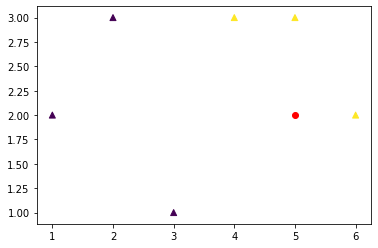

In [2]:
# Initialize dataset
x_train = [
    [1., 2.],
    [2., 3.],
    [3., 1.],
    [4., 3.],
    [5., 3.],
    [6., 2.]
]
y_train = [
    [0.],
    [0.],
    [0.],
    [1.],
    [1.],
    [1.]
]
x_test = [[5., 2.]]
y_test = [[1.]]

# Visualize the dataset
x1 = [ x[0] for x in x_train ]
x2 = [ x[1] for x in x_train ]
colors = [ y[0] for y in y_train ]

plt.scatter( x1, x2, c=colors, marker='^' )
plt.scatter( x_test[0][0], x_test[0][1], c='red' )
plt.show()

In [3]:
# Transform the dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).\
            batch(len(x_train))

## 2. Initialize weights and bias

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

## 3. Define hypothesis

In [5]:
def logistic_regression(features):
    hypothesis = tf.divide( 1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

## 4. Define loss function

In [6]:
def loss_fn(hypothesis, labels):
    loss = -tf.reduce_mean(    labels * tf.math.log(hypothesis) +
                            (1-labels) * tf.math.log(1-hypothesis) )
    return loss

## 5. Select optimizer

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

## 6. Define a metric for model's performance

In [8]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast( hypothesis > 0.5, dtype=tf.float32 )
    accuracy = tf.reduce_mean( tf.cast(tf.equal(predicted, labels),
                                       dtype=tf.int32) )
    return accuracy

## 7. Calculate a gradient

In [9]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn( logistic_regression(features), labels )
    return tape.gradient( loss, [W,b] )

## 8. Train & Test the model

In [10]:
Epochs = 1001

for step in range(Epochs):
    for features, labels in dataset:
        grads = grad(features, labels)
        optimizer.apply_gradients( grads_and_vars=zip(grads, [W,b]) )
        
        if step % 100 == 0:
            print(f'Iter: {step:5}  |  ' +
                  f'Loss: {loss_fn(logistic_regression(features), labels):.4f}')
print()
test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print(f'Test set accuracy: {test_acc:.4f}')

Iter:     0  |  Loss: 0.6874
Iter:   100  |  Loss: 0.5776
Iter:   200  |  Loss: 0.5349
Iter:   300  |  Loss: 0.5054
Iter:   400  |  Loss: 0.4838
Iter:   500  |  Loss: 0.4671
Iter:   600  |  Loss: 0.4535
Iter:   700  |  Loss: 0.4420
Iter:   800  |  Loss: 0.4319
Iter:   900  |  Loss: 0.4228
Iter:  1000  |  Loss: 0.4144

Test set accuracy: 1.0000
